In [12]:
!pip install shap

In [28]:
import os
from PIL import Image

import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np
import shap
import matplotlib.pyplot as plt

from torchvision import models 

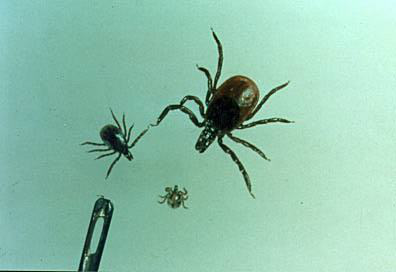

In [25]:
ROOT_DIR = os.path.abspath(os.path.dirname(__name__))
img = Image.open(os.path.join(ROOT_DIR, 'Data', os.listdir('Data')[0]))
img

In [26]:
model = models.convnext_base(weights="IMAGENET1K_V1")

In [29]:
model.eval()

weights = models.ConvNeXt_Base_Weights.IMAGENET1K_V1
preprocess = weights.transforms()

batch = preprocess(img).unsqueeze(0)
pred = model(batch).squeeze(0).softmax(0)

In [33]:
pred.shape

torch.Size([1000])

In [ ]:
e = shap.DeepExplainer(model, batch)
shap_values = e.shap_values(batch)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
